<a href="https://colab.research.google.com/github/lake198/Study-AI/blob/main/%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Study_AI/DNN_code_colab_lesson_1_2')

In [ ]:
from common import functions
from common import optimizer
from common import layers

import numpy as np
import matplotlib.pyplot as plt

# Section1: 勾配消失問題

誤差逆伝搬にてニューラルネットワークを学習する際に、損失関数の勾配が限りなく小さくなり、学習が進まなくなる場合がある。これを勾配消失と呼ぶ。例えば活性化関数にシグモイド関数を用いた場合、層が進むごとに0~0.25が乗算される。従って、層が深いニューラルネットワークでは入力層付近では勾配が非常に小さくなってしまう。これを回避するために以下のような対策が取られる。\

# ReLU関数
勾配消失問題を回避する方法の一つとして、活性化関数にReLU関数を用いる。ReLU関数は入力値が正の場合はそのままの値を返し、負の場合は0を返す。この性質により各層の発火しているノードではそのまま値が次の層に伝わるので勾配が消失しない。

# 初期値設定
適切な初期値を与えることで学習の速度を速めることができる。活性化関数にシグモイド関数やtanh関数を用いる場合は、前の層のノード数 $n$ に対して初期の重みを平均値0、分散 $\frac{1}{\sqrt{n}}$ の正規分布とするXavierの初期値を用いると良い。またReLU関数を用いる場合はXavierの初期値に $\sqrt{2}$ を乗算したHeの初期値を用いると良い。

# バッチ正規化
バッチ単位で活性化関数への入力値、または活性化関数の出力値を、平均0、分散1の正規分布に従うように変換する。



## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1slVyalKxnT7Rp3hfMQMBn7-9yEzquE53" width=50%>


データ読み込み完了


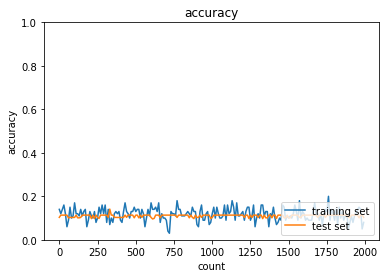

In [ ]:
# Sigmoid 関数による勾配消失

from lesson_2.multi_layer_net import MultiLayerNet

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

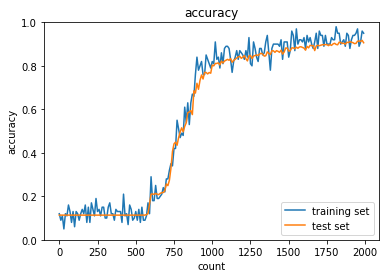

In [ ]:
# 活性化関数に ReLU関数 を使用 

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

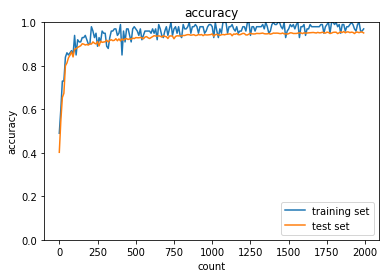

In [ ]:
# 活性化関数にReLU関数使用　かつ　He の初期値を使用

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()


# [Section2]　学習率最適化手法

パラメータを更新する際に、学習率が大きすぎると勾配が発散してしまい学習を進めても最適値に収束しない。また学習率が小さすぎると学習の進みが遅くなり、また局所的最適値に収束してしまい、真の最適値に到達できない場合がある。これらを回避するために、以下の学習率最適化手法が用いられる。
# ◇モメンタム
パラメータ更新の際に、前回のパラメータ更新量 $\Delta {\bf w}$ を定数倍した慣性項を加える。収束が早くなり、また大局的最適解に到達しやすくなる。
# AdaGrad
パラメータ更新毎に勾配の2乗を足してパラメータ $h$ を更新する。学習率をこの $h$ の平方根で除した値を新たな学習率として重みパラメータを更新する。\
\
$$
h \leftarrow h + (\nabla E)^2 \\
{\bf w} \leftarrow {\bf w} - \frac{\eta}{\sqrt{h}}\nabla E
$$

# RMSProp
AdaGradにおける $h$ の更新時に、勾配の2乗と前回更新時の $h$ との加重平均を計算する。ハイパーパラメータである $\alpha$ はどの程度過去の影響を残すかを決定する。\
\
$$
h \leftarrow \alpha h + (1-\alpha)(\nabla E)^2 \\
$$

# Adam
更新時に勾配 $\nabla E$ とその2乗である $(\nabla E)^2$ のそれぞれに対して、前回更新時のパラメータとの加重平均を計算し、新たなパラメータとする。モメンタムとRMSPropの両方の性質を持つ。\
\
$$
m \leftarrow \alpha m + (1-\alpha)\nabla E \\
h \leftarrow \beta h + (1-\beta)(\nabla E)^2 \\
{\bf w} \leftarrow {\bf w} - \eta\frac{m}{\sqrt{h}}\nabla E
$$

## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1-vbEVXvu0uBwkEoW-xXNtzQZAX269Ej1" width=50%>


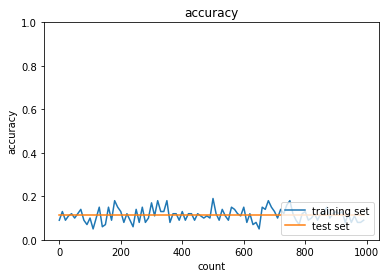

In [ ]:
# SGD
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# print("データ読み込み完了")
network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

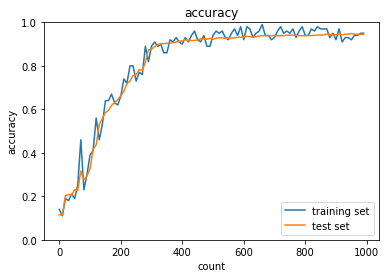

In [ ]:
# Adam

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# Section3 過学習

ニューラルネットワークの学習において訓練データに対して過剰に最適化が進んでしまい、未知の入力データに対する予測結果と正解との乖離が大きくなってしまう場合がある。これを過学習と呼ぶ。

# 正則化
過学習の原因の一つに、重みパラメータ $\bf w$ の値が大きくなりすぎる事がある。これを防ぐために正則化を行う。モデルの最適化とは、モデルの予測結果と正解との誤差 $E$ を損失関数 $L$ として、これを最小化する事である。正則化ではこの損失関数に、重みの大きさをペナルティ項として追加する。これによって誤差と重みの両方が小さくなるように最適化が行われ、過学習を防ぐことができる。正則化項に $\bf w$ のL1ノルムを用いる場合をL1正則化（Lasso回帰） L2ノルムを用いる場合をL2正則化（Ridge回帰）と呼ぶ。\
\
$$\begin{align*}
& L_{lasso}=E({\bf w}) + \lambda \|{\bf w}\|_1\\[4pt]
& L_{ridge}=E({\bf w}) + \frac{1}{2}\lambda \|{\bf w}\|_2
\end{align*}$$
\
$\lambda$ は正則化項の影響の強さを決めるハイパーパラメータである。各正則化の性質として、Ridge回帰では重み全体が小さくなるが、Lasso回帰では予測結果への寄与が小さい重みが0になりやすい。従って、全ての特徴量が重要な場合はRidge回帰を選択し、重要な特徴のみ残したい場合はLasso回帰を選択すればよい。

# ドロップアウト
ニューラルネットワークにおいて、ノードの数を増やせばモデルの表現力は上がるが、過学習も起きやすくなる。ドロップアウトは、一定の確率でノードを無視して学習を進めることで過学習を抑制する。この時、無視されるノードは毎回ランダムに選ばれるが、これは毎回異なるネットワークを学習しているとも言える。即ち、ドロップアウトを行うことで、複数のモデルを用いて予測結果を向上させるアンサンブル学習の効果も見込むことができる。

## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1MnI7MegCJ_2C7rG3BXmusaqEgC6pL8MG" width=50%>


データ読み込み完了


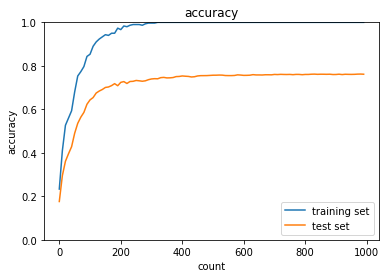

In [ ]:
# 過学習

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了


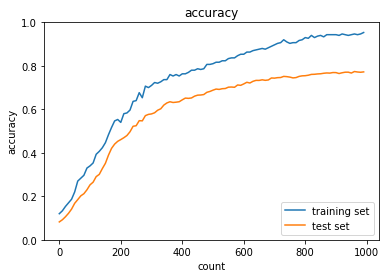

In [ ]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#[Section4]　畳み込みニューラルネットワーク

CNN(Convolutional Neural Newwork)は画像認識の分野で特に用いられる機械学習の手法である。画像データは（縦×横×チャネル数）のピクセルで構成され、3または2次元の構造を持つ（カラー画像：チャネル数=3、グレースケール画像：チャネル数=1）。全結合型NNでは入力時にデータが1次元に変換されるのに対し、CNNではデータの次元を保持したまま入力することができる。これは各ピクセル間のつながり（空間情報）を失わずに学習が可能という事である。

# 畳み込み層
畳み込み層は複数のチャネルを持ち、チャネル毎に入力画像から特徴を抽出するためのフィルタを持つ。畳み込み層での計算の概要を下図に示す。

フィルタは $K \times L$ のサイズを持ち、各セルに重み $w_{kl}$ を持つ。畳み込み演算では、まず入力画像からフィルタと同サイズの領域（ウィンドウ）を切り出す。次にウィンドウとフィルタの積和にバイアスを加えた値を出力値として格納する。この計算を一定間隔でずらしながら全てのウィンドウに対して行う事で、畳み込み結果を得る。この時のウィンドウの間隔をストライドと呼ぶ。\
上図の畳み込み計算において、入力画像の4隅にある 2x2 ピクセルに着目すると、フィルタによる特徴抽出が1回しか行われていない。そこで入力画像の上下左右に任意の数だけピクセルの行・列を追加する。この操作をパディングと呼ぶ。パディングによって画像端の特徴を不足なく抽出できる他、出力する畳み込み画像のサイズを調整することができる。またパディングで追加するピクセルに与える値は任意だが、0とする場合が多い。\
今、サイズ $(M \times N)$ の入力画像を $p$ でパディングし、これをサイズ $(K \times L)$ のフィルタを用いてストライド $s$ で走査した場合、得られる畳み込み画像のサイズ$(I \times J)$は次式で得られる。\
\
$$
I=\left\lfloor \frac{N+2p-K}{s} \right\rfloor + 1 \ , \quad
J=\left\lfloor \frac{M+2p-L}{s} \right\rfloor + 1\\[16pt]
$$
\
<img src="https://drive.google.com/uc?export=view&id=1zqjdWTlpp741sOjhxc_DOGCE-SMLoDn8" width=60%>




## パディング
<img src="https://drive.google.com/uc?export=view&id=1oe0Wjm42n9Rcjd3DwrssUDSsuXfjmVWf" width=50%>

## プーリング
プーリング層では入力画像を任意サイズの区画に分けて、その区画内で特徴的な値（最大値や平均値）を抽出する操作を行う。これによって入力画像の特徴を残したまま、データサイズを削減することができる。

\
<img src="https://drive.google.com/uc?export=view&id=1ma2kKZFTrNjiPd16qBCwWehJPldRqQhq" width=60%>


## 確認テスト
\
<img src="https://drive.google.com/uc?export=view&id=1v3K5Az6qQx4zu_8YDUOJLO1kZupxZ-FU" width=50%>




In [ ]:
# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    # 切り捨て除算
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col

In [ ]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 3
filter_w = 3
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')

========== input_data ===========
 [[[[86. 43. 83. 27.]
   [46. 86. 48. 62.]
   [93. 14. 65. 24.]
   [68. 30. 20. 32.]]]


 [[[66.  3. 79. 43.]
   [99. 29. 91. 51.]
   [11. 55. 31. 79.]
   [98. 36. 18. 61.]]]]
============= col ==============
 [[86. 43. 83. 46. 86. 48. 93. 14. 65.]
 [43. 83. 27. 86. 48. 62. 14. 65. 24.]
 [46. 86. 48. 93. 14. 65. 68. 30. 20.]
 [86. 48. 62. 14. 65. 24. 30. 20. 32.]
 [66.  3. 79. 99. 29. 91. 11. 55. 31.]
 [ 3. 79. 43. 29. 91. 51. 55. 31. 79.]
 [99. 29. 91. 11. 55. 31. 98. 36. 18.]
 [29. 91. 51. 55. 31. 79. 36. 18. 61.]]


# [Section5] AlexNet

AlexNet は 2021 年に登場した畳み込みNNであり、それまでの画像認識タスクと比べて大幅に精度を向上させた。224×224 の画像を入力にとり、5つの畳み込み層と3つの全結合層を含む。また最初の2つの畳み込み層では max pooling 処理を行い、特徴マップのダウンサンプリングを行っている。過学習に対応する施策として、サイズ 4096 の全結合層にてドロップアウトを行っている。

## 確認テスト

\
<img src="https://drive.google.com/uc?export=view&id=1bBE9q4q3prqUCty1iOb8jv8I-HEh5vYZ" width=50%>


In [ ]:
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        #maxプーリング
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

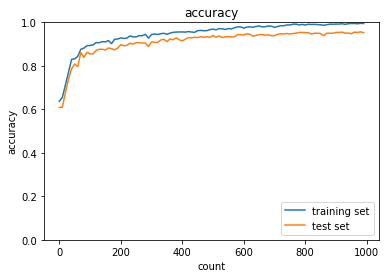

In [ ]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

# print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:4000], d_train[:4000]
x_test, d_test = x_test[:800], d_test[:800]


network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        # print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        # print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()